# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunos: Sérgio Strack Junior

Sabrina de Melo


Para o seguinte estudo, Utilizamos o capítulo 2.1 da AP42, pois meu empreendimento emite poluentes a partir do processo de gaseificador. 

Empreendimento: Serrana Engenharia LTDA.

Resumo do processo: A gaseificação é definida como conversão de biomassa, ou qualquer combustível sólido (material carbonáceo sólido ou líquido), em um gás energético, através da oxidação parcial à elevada temperatura 500°C – 1400°C e pressão variável (atmosférica à 33 bar) (Morrin, Lettieri et al., 2011). Durante a gaseificação, a maior parte do material de alimentação é termicamente decomposto na forma de gás, porém pequenas quantidades de subprodutos são também formadas, incluindo alcatrão, carvão e cinzas.

- Gaseificadores com capacidade de 3 mil toneladas de RSU por mês
- Cada gaseificador trata, por dia, 45,3t de RSU e 2,5t de água contaminada e chorume. 
- Para isso utiliza 27,8t de ar atmosférico produzindo 6,3t de cinzas e 64,3t de GCDR.
- Entram no depósito 91,2t/dia de RSU, aproximadamente, 4 a 5 caminhões/dia.

Utiliamos códigos para encontrar nossa tabela de dados em nosso computador.

In [22]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 2
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

i:\airpolution\tabelas\FE
chp_2_2.csv
                   Processos       PM       Hg        Ni        Pb   SO2  HCl
0             Nao controlado  12.6000  0.00280  0.003930  0.107000  1.73  3.2
1                     Reator   0.1050  0.00280  0.000056  0.001500  0.00  0.0
2  Sistema de Limpeza do gas   0.0295  0.00198  0.001610  0.001450  0.00  0.0
3      Reuperacao de energia   0.0352  0.00163  0.000135  0.000458  0.00  0.0


Gráficos referentes ao processos de emissão do empreendimento de estudo:

Considerando uma taxa de 45,3t de RSU por dia.

Processos    Nao controladoNao controladoNao controladoNao ...
PM                                                   578467.41
Hg                                                     417.213
Ni                                                    259.6143
Pb                                                   5001.4824
SO2                                                    78369.0
HCl                                                   144960.0
dtype: object
1
2
3
4
5
6


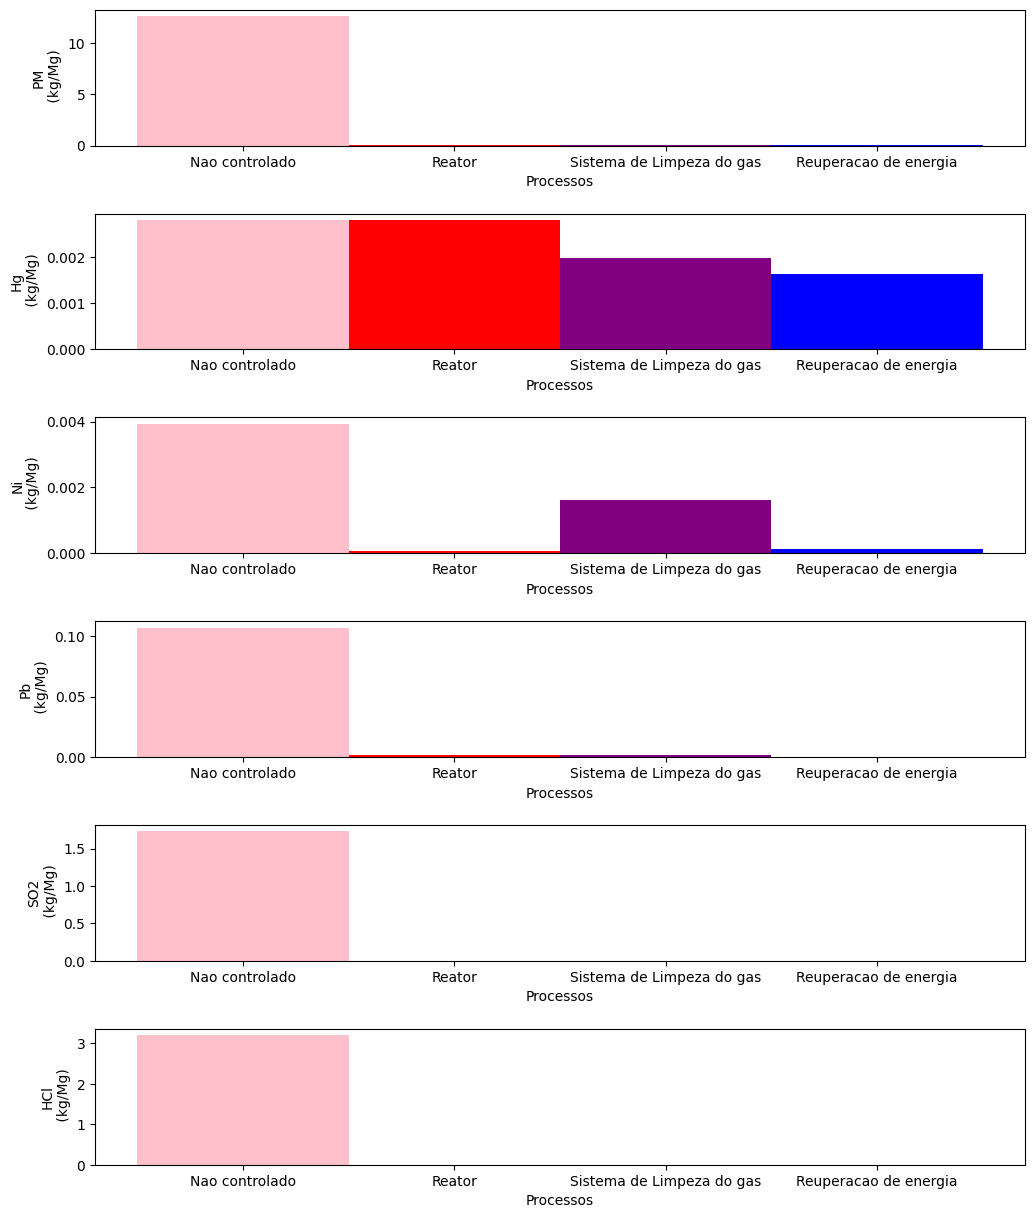

In [23]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # Kg/dia Considerando uma taxa de atividade
emis = fe*atv

#somando dataframe
print(emis.sum())
largura_barra = 1

#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,figsize=(12, 15))

#loop para preencher o subplot com os graficos de barra com os valores da planilha
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Processos'],fe.iloc[:,ii], color=['pink', 'red','purple','blue','yellow'], width=largura_barra)
    ax[ii-1].set_xlabel('Processos', fontsize = 10)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)', fontsize = 10)
    plt.subplots_adjust(hspace=0.5)
   
fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

# Os gráficos mostram no eixo Y as concentrações dos poluentes e no eixo X os processos que estão emitindo esses poluentes.
# CONCENTRAÇÃO X PROCESSOS

Criando Taxa de Atividade aleatória com sazonalidade


Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

Pergunta n° 2 - Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

Esse código retorna as emissões estimadas conforme a nossa taxa de atividade.

In [24]:
import pandas as pd

def estimar_emissao(taxa_atividade, arquivo_planilha):
    # Ler a planilha de fatores de emissão
    df = pd.read_csv(arquivo_planilha)
    
   # Calcular as emissões
    emissao0 = taxa_atividade * df['PM'].sum()
    emissao1 = taxa_atividade * df['Hg'].sum()
    emissao2 = taxa_atividade * df['Ni'].sum()
    emissao3 = taxa_atividade * df['Pb'].sum()
    emissao4 = taxa_atividade * df['SO2'].sum()
    emissao4 = taxa_atividade * df['HCl'].sum()

    # Retornar uma lista de emissões
    return [emissao0, emissao1, emissao2, emissao3, emissao4]

taxa_atividade = 524.3055  #g/s  -> referente a taxa de atividade de 45.3ton/dia  
arquivo_planilha = r'I:\airpolution\tabelas\FE\chp_2_2.csv'  
emissoes_estimadas = estimar_emissao(taxa_atividade, arquivo_planilha)
print("Emissões estimadas:", emissoes_estimadas)



Emissões estimadas: [6695.223943350001, 4.8288536550000005, 3.0047948205000004, 57.887521644, 1677.7776000000003]


[604.50711951 721.66456318 270.2112171  710.82055526 562.11527179
 479.22240639 536.16271466 694.21395145 640.76974412 524.96817386
 517.83099101 733.63981134 383.96934077 312.32735613 617.96675201
 630.32662283 560.16047772 399.80053595 417.3211491  585.67193532
 405.26478848 524.10639787 436.25990239 529.77784013 382.40778625
 365.99508939 646.99266955 464.39080511 384.08677969 712.2284007
 472.76557684 322.90188635 633.38662792 408.94211368 558.51216166
 589.15849794 766.83736851 362.34627049 411.14425135 750.92218016
 638.75815371 497.73873502 647.3990399  478.89195395 477.14411317
 344.16086841 535.86511617 399.867579   594.3493744  471.14320772
 709.76447467 666.58312016 339.7128735  572.06542722 636.37134473
 531.87651437 321.89369942 526.00764121 489.12326927 432.94630833
 567.57922552 432.48381291 385.65472656 647.9903977  374.02256022
 684.37068521 775.53390717 493.49587142 688.0954519  350.42688367
 680.18419924 766.78115589 533.2305358  396.22645054 346.47282072
 742.746612

Text(0, 0.5, 'Valores das concentrações')

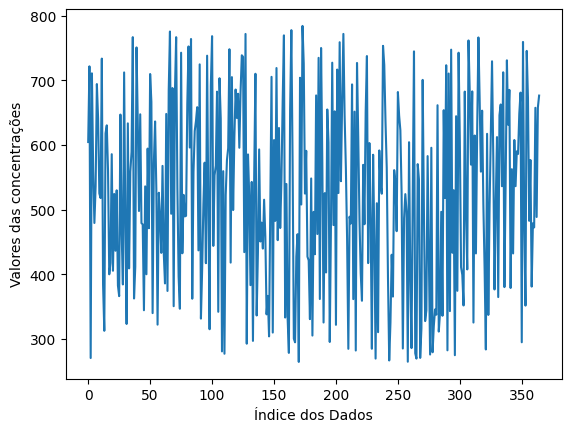

In [25]:
# Criando vetor com os valores de máxima e miníma das concentrações dos poluentes
import numpy as np
atvMax = 786.46 #kg/dia 
atvMin = 262.15 #kg/dia
n = 365
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin #valores que representam a concentração dos poluentes
print(atv)

# Criando uma figura com os valores
fig, ax= plt.subplots()
ax.plot(atv)
ax.set_xlabel('Índice dos Dados')
ax.set_ylabel('Valores das concentrações')

In [26]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [27]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin 
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")


          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  464.334350
1   2024-01-02    1           2  492.879605
2   2024-01-03    1           3  535.166603
3   2024-01-04    1           4  263.990693
4   2024-01-05    1           5  364.419287
..         ...  ...         ...         ...
361 2024-12-27   12         362  646.466040
362 2024-12-28   12         363  523.966571
363 2024-12-29   12         364  614.096010
364 2024-12-30   12         365  681.264230
365 2024-12-31   12         366  557.897290

[366 rows x 4 columns]


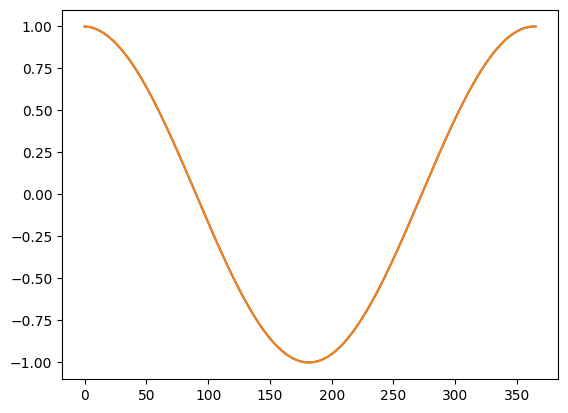

In [28]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365) # taxa de resíduo queimados por diário
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

523.0574971783377


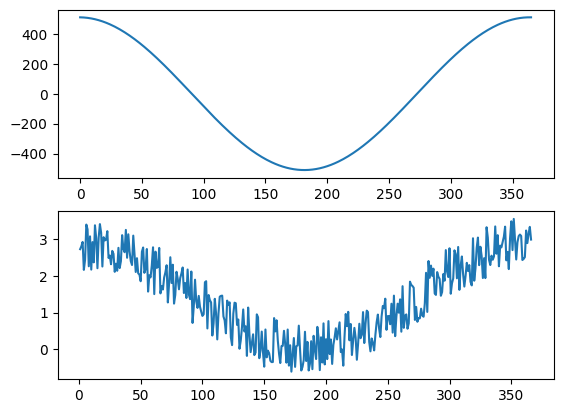

In [29]:
# Valores aleatórios com sazonalidade

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.0028

fig,ax= plt.subplots(2)

ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365)

# O df foi multiplicando por valor empírico para chegar próximo a média anual.

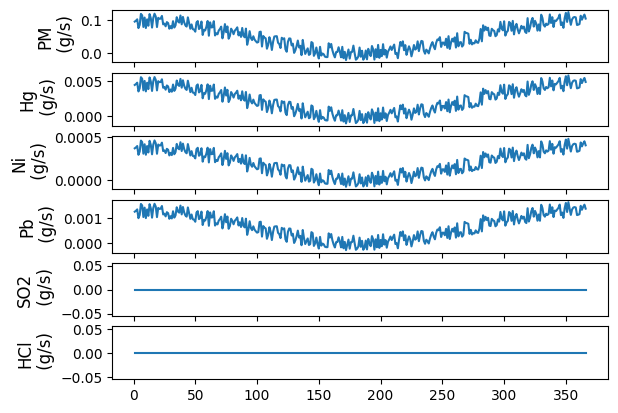

In [30]:
fig,ax= plt.subplots(6)
for ii in range (1,7):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[3,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (g/s)', fontsize = 12)

# Gráfico abaixo está mostrando o comportamento de emissão do Gaseificador do empreendimento SALUMA.
# Neste gráfico podemos ver que o pico emissão se dá no início do ano e no final, contando há uma maior concentração de poluentes sendo emitidos na atmosfera.

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sazonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parame

Variabilidade da taxa de atividade: 0.15686983476465308


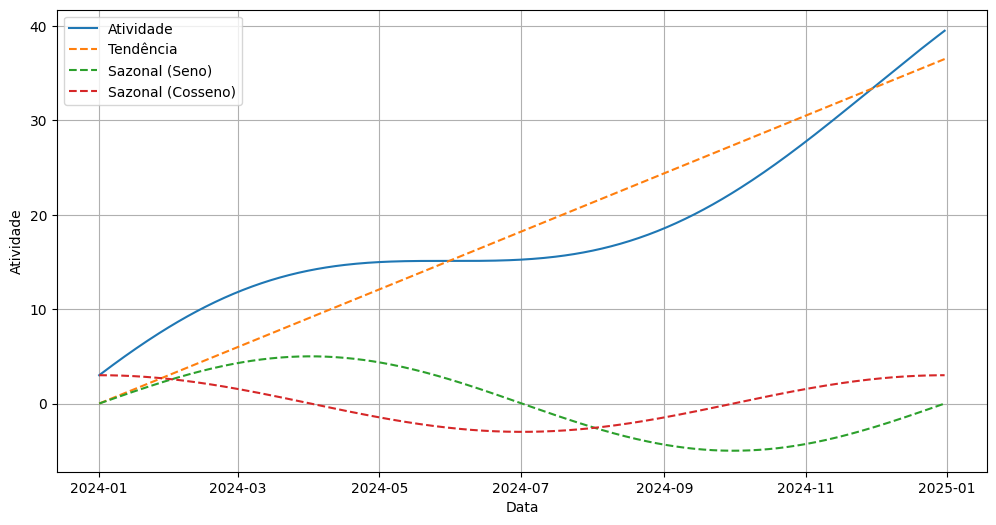

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D') #Gera um intervalo de datas de 1 de janeiro de 2024 a 31 de dezembro de 2024, com frequência diária.
n = len(datas) #comprimento do intervalo de datas.
trend = 0.1 * np.arange(n)  # tendência linear multiplicando uma sequência numérica pelo valor 0.1.
sazonal_sin = 5 * np.sin(2 * np.pi * np.arange(n) / 365)  # componente sazonal seno
sazonal_cos = 3 * np.cos(2 * np.pi * np.arange(n) / 365)  # componente sazonal cosseno
noise = np.random.normal(loc=0, scale=2, size=n)  # ruído aleatório usando uma distribuição normal com média 0 e desvio padrão 2.
taxa_atividade = trend + sazonal_sin + sazonal_cos #Calcula a taxa de atividade como a soma da tendência, componente sazonal senoidal, componente sazonal cosenoidal e ruído.

# Criar DataFrame
data = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade}) #Cria um DataFrame com as datas e a taxa de atividade.
data.set_index('Data', inplace=True) 

# Ajustar o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(data['Atividade'], order=(1, 1, 1), sazonal_order=(1, 1, 1, 12)) # Define um modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) com uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1
results = model.fit() # Ajusta o modelo aos dados.

# Calcular a variabilidade da taxa de atividade
variability = np.std(results.resid) #Calcula o desvio padrão dos resíduos do modelo ajustado.
print("Variabilidade da taxa de atividade:", variability) 

# Plotar os resultados de dados de taxa de atividade, tendência, componente sazonal senoidal e componente sazonal cosenoidal em um gráfico.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Atividade'], label='Atividade')
plt.plot(data.index, trend, label='Tendência', linestyle='--')
plt.plot(data.index, sazonal_sin, label='Sazonal (Seno)', linestyle='--')
plt.plot(data.index, sazonal_cos, label='Sazonal (Cosseno)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Atividade')
plt.legend()
plt.grid(True)
plt.show()

#O objetivo desse código é:
#- Gera uma série temporal de dados de exemplo para a taxa de atividade ao longo de um ano. A série temporal é composta por uma tendência linear, uma componente sazonal senoidal e uma componente sazonal cosenoidal;
#- Um modelo SARIMA é ajustado aos dados de exemplo. O modelo SARIMA é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que inclui componentes sazonais. 
#Neste caso, o modelo SARIMA tem uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1;
#-A variabilidade da taxa de atividade é calculada como o desvio padrão dos resíduos do modelo ajustado.

Spbre o gráfico: 
- O gráfico nos apresenta um crescimento com tendência a aumentar a cada ano que passa, ou seja, como o crescimento da atividade está aumentando a tendência de poluentes emitidos na atmosfera.